#Projeto ByteBank

###Objetivo geral: fazer um modelo de decisão de crédito, que irá aprovar ou negar o crédito para um cliente que venha solicitar empréstimo para o ByteBank (banco fictício). A decisão será baseado nas variáveis cadastrais (cadastro) e baseado no perfil de crédito do cliente.

Projeto desenvolvido durante o módulo 6 do Bootcamp de Data Sciense da Alura (fevereiro de 2022).

In [1]:
#dataset em https://github.com/alura-cursos/Avaliacao_Credito/tree/main/dados

import pandas as pd

df_clientes_cadastrados = pd.read_csv('https://raw.githubusercontent.com/anderboni/Credito_Avaliacao/main/dados/clientes_cadastrados.csv')
df_clientes_cadastrados.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [2]:
#exibindo quantidade de colunas e linhas

df_clientes_cadastrados.shape

(438557, 18)

In [3]:
df_clientes_cadastrados['ID_Cliente'].value_counts()

#abaixo é possível verificar possíveis dados duplicados (há mais de um cliente por ID)

7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [4]:
#verificando se é a linha inteira duplicada ou somente o ID

df_clientes_cadastrados.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
438552    False
438553    False
438554    False
438555    False
438556    False
Length: 438557, dtype: bool

In [5]:
df_clientes_cadastrados.duplicated().sum()

#retornando "zero" indica que não temos a linha inteira duplicada. 

0

In [6]:
#como somente o ID está duplicado, não é possível simplesmente excluir a linha
#vamos agora exibir somente os IDs repetidos...

df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated()]

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
421349,7602432,M,0,0,0,117000.0,Pensionista,Ensino superior,Casado,Casa propria,68.0,1,0,0,0,Outros,2.0,-1000.7
422660,7052783,H,1,1,2,166500.0,Empregado,Ensino medio,Casado,Casa propria,44.0,1,1,0,1,Gerencia,4.0,7.4
423702,7838075,M,1,1,0,315000.0,Associado comercial,Ensino superior,Solteiro,Casa propria,29.0,1,0,0,1,Outros,1.0,4.5
424480,7053557,H,1,1,1,193500.0,Empregado,Ensino medio,Casado,Casa propria,29.0,1,1,0,0,Equipe principal,3.0,6.2
425306,7023651,M,0,0,0,225000.0,Associado comercial,Ensino superior incompleto,Solteiro,Casa propria,28.0,1,0,0,0,Contabilidade,1.0,3.3
425724,7213374,H,0,0,1,270000.0,Associado comercial,Ensino superior,Casado,Casa propria,39.0,1,0,1,0,Gerencia,3.0,2.9
426198,7089090,M,0,1,1,189000.0,Associado comercial,Ensino superior incompleto,Casado,Casa propria,28.0,1,0,0,0,Equipe principal,3.0,4.7
426325,7576316,M,0,0,1,405000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,33.0,1,1,1,0,Venda,2.0,0.5
426488,7023108,M,0,0,0,135000.0,Empregado,Ensino medio,Casado,Casa propria,48.0,1,0,0,0,Limpeza,2.0,3.5
426665,7137299,M,0,1,0,292500.0,Empregado,Ensino medio,Solteiro,Apartamento comercial,54.0,1,0,0,0,Limpeza,1.0,5.7


In [7]:
#verificamos a quanitdade duplicada rodando com o .shape

df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)].shape # "keep=False" conta todas as linhas de todos os IDs repetidos.

(94, 18)

In [8]:
#identificando, guardando os dados numa variável e removendo os dados

id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']
id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

In [9]:
#cada linha agora é um cliente

df_clientes_cadastrados_ID_unicos = df_clientes_cadastrados.drop(id_repetidos.index)
df_clientes_cadastrados_ID_unicos.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [10]:
#agora verificamos que somente temos um ID (cliente) por linha

df_clientes_cadastrados_ID_unicos['ID_Cliente'].value_counts()

5008804    1
6147691    1
6147689    1
6147688    1
6147685    1
          ..
6093492    1
5690720    1
6538938    1
6538937    1
6842885    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [11]:
#vamos verificar se há dados nulos

df_clientes_cadastrados_ID_unicos.isnull().sum() 
#não será necessário tratamento, pois não há dados nulos neste DF

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [12]:
#verificando o tipo de dados (entendendo as variáveis)

df_clientes_cadastrados_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

##Analisando a base de cadastro de clientes

In [13]:
colunas_quantitativas = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']

In [14]:
#fazendo um slice (separando os dados)

df_clientes_cadastrados_ID_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,-165.936036,2.194461
std,11.472815,0.724879,1.100832e+05,380.201131,0.897194
min,21.000000,0.000000,2.610000e+04,-1000.700000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


In [15]:
#verificando os desempregados cadastrados na base de dados

df_clientes_cadastrados_ID_unicos.query("Anos_empregado <= 0")

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
7,5008812,M,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
8,5008813,M,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
9,5008814,M,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
76,5008884,M,0,1,0,315000.0,Pensionista,Ensino medio,Viuvo,Casa propria,55.0,1,0,0,0,Outros,1.0,-1000.7
160,5008974,M,0,1,0,112500.0,Pensionista,Ensino medio,Casado,Casa propria,61.0,1,0,0,0,Outros,2.0,-1000.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,6840098,M,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438550,6840100,M,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438551,6840102,M,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7


In [16]:
#filtrando apenas duas colunas

df_clientes_cadastrados_ID_unicos.query("Anos_empregado <= 0")[['Anos_empregado', 'Categoria_de_renda']].value_counts()

#tentando entender o "-1000", verificamos que todos são "pensionistas"

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

In [17]:
#para não influenciar na média, será preciso tratar esses dados com "-1000", pois não retrata o mundo real
#iremos substituir esse valor sem distorcer os dados

df_clientes_cadastrados_ID_unicos['Anos_empregado'].replace(-1000.7, -1) 

0         12.4
1         12.4
2          3.1
3          8.4
4          8.4
          ... 
438552    -1.0
438553     8.2
438554     1.0
438555    -1.0
438556     3.3
Name: Anos_empregado, Length: 438463, dtype: float64

In [18]:
#sobrescrevendo os valores da coluna "Anos_empregado"

df_clientes_cadastrados_ID_unicos['Anos_empregado'] = df_clientes_cadastrados_ID_unicos['Anos_empregado'].replace(-1000.7, -1) 

In [19]:
#importando bibliotecas de visualização

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [20]:
#identificando outros outliers
#nosso modelo não deve considerar os "ponntos fora da curva" (outliers). Se ele se ajustar tanto assim, pode ocorrer um overfit.

df_clientes_cadastrados_ID_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,5.780633,2.194461
std,11.472815,0.724879,1.100832e+05,6.733151,0.897194
min,21.000000,0.000000,2.610000e+04,-1.000000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


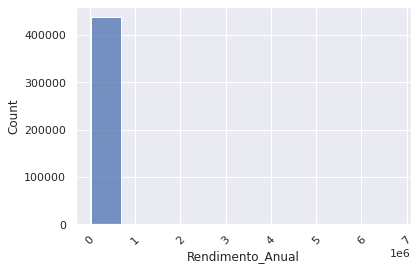

In [21]:
#plotando um histograma

sns.histplot(data=df_clientes_cadastrados_ID_unicos, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

In [22]:
#o efeito acima é causado justamente pelos outliers
#vamos tratar os dados para remover este outlier
#vamos isolar a variável "Rendimento_Anual"

coluna = df_clientes_cadastrados_ID_unicos['Rendimento_Anual']

#descobrindo a média do rendimento anual

coluna_med = coluna.mean() 
coluna_std = coluna.std()

#calculo do limite superior para determinar o outlier

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

#identificando agora os clientes com rendimento anual qu passam do limite inferior e superior

index_outliers = []

#passando por todos os valores de rendimento anual

for index, valor in coluna.items():
  if valor > limite_sup or valor < limite_inf:
    index_outliers.append(index)

len(index_outliers)

12641

In [23]:
#acima verificamos que são "12641" clientes em situação de outliers.

#criando agora um novo dataframe

df_clientes_cadastrados_sem_outliers = df_clientes_cadastrados_ID_unicos.drop(index_outliers)
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

In [24]:
df_clientes_cadastrados_sem_outliers[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,5.744956,2.191683
std,11.525400,0.723577,75033.530551,6.736649,0.896300
min,21.000000,0.000000,26100.000000,-1.000000,1.000000
25%,34.000000,0.000000,117000.000000,1.000000,2.000000
50%,43.000000,0.000000,157500.000000,4.000000,2.000000
75%,53.000000,1.000000,225000.000000,8.500000,3.000000
max,69.000000,19.000000,405000.000000,48.000000,20.000000


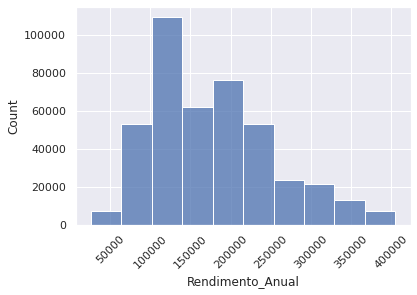

In [25]:
#plotando novamente o histograma

sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

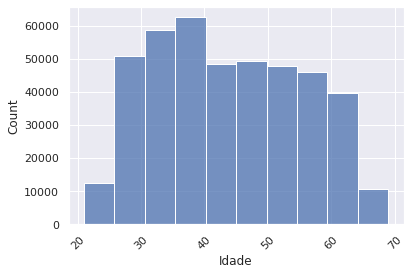

In [26]:
#olhando outras colunas com o histograma

sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Idade', bins=10)
plt.xticks(rotation=45)
plt.show()

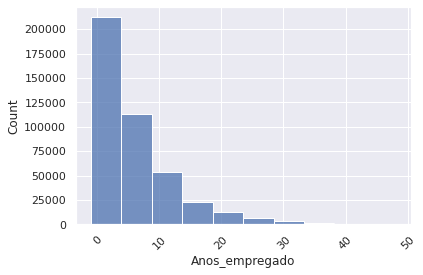

In [27]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Anos_empregado', bins=10)
plt.xticks(rotation=45)
plt.show()

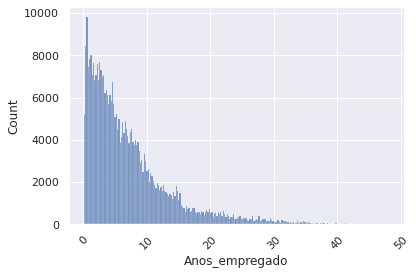

In [28]:
#histograma com "query" para mostrar apenas "Anos_empregado" positivo

sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Anos_empregado > 0"), x='Anos_empregado')
plt.xticks(rotation=45)
plt.show()

In [29]:
#trabalhando agora com as variáveis categóricas do dataframe

df_clientes_cadastrados_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425822 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             425822 non-null  int64  
 1   Genero                 425822 non-null  object 
 2   Tem_Carro              425822 non-null  int64  
 3   Tem_Casa_Propria       425822 non-null  int64  
 4   Qtd_Filhos             425822 non-null  int64  
 5   Rendimento_Anual       425822 non-null  float64
 6   Categoria_de_renda     425822 non-null  object 
 7   Grau_Escolaridade      425822 non-null  object 
 8   Estado_Civil           425822 non-null  object 
 9   Moradia                425822 non-null  object 
 10  Idade                  425822 non-null  float64
 11  Tem_Celular            425822 non-null  int64  
 12  Tem_telefone_trabalho  425822 non-null  int64  
 13  Tem_telefone_fixo      425822 non-null  int64  
 14  Tem_email              425822 non-nu

In [30]:
colunas_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria', 
                       'Categoria_de_renda', 'Grau_Escolaridade',
                       'Estado_Civil', 'Moradia', 'Tem_Celular',
                       'Tem_telefone_trabalho', 'Tem_telefone_fixo',
                       'Tem_email', 'Ocupacao']

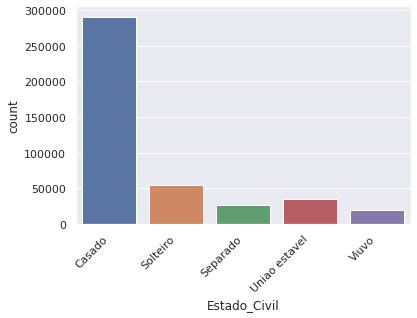

In [31]:
#plotando os gráficos

sns.countplot(data=df_clientes_cadastrados_sem_outliers, x='Estado_Civil')
plt.xticks(rotation=45, ha="right")
plt.show()

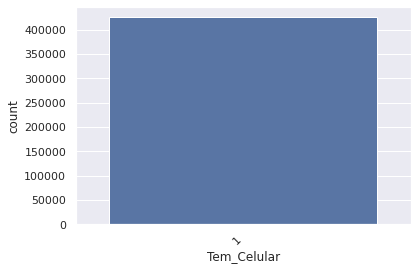

In [32]:
sns.countplot(data=df_clientes_cadastrados_sem_outliers, x='Tem_Celular')
plt.xticks(rotation=45, ha="right")
plt.show()

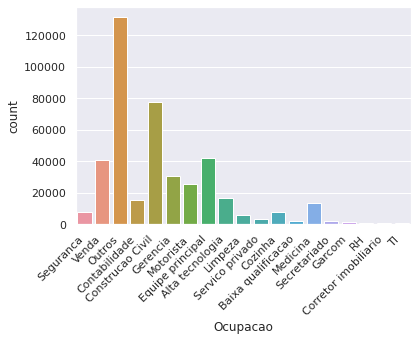

In [33]:
sns.countplot(data=df_clientes_cadastrados_sem_outliers, x='Ocupacao')
plt.xticks(rotation=45, ha="right")
plt.show()

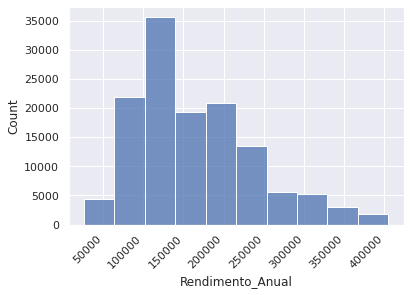

In [34]:
#histograma de rendimento anual apenas de clientes que declararam sua ocupação como "Outros"

sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Ocupacao == 'Outros'"), x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45, ha="right")
plt.show()

In [35]:
#removendo o campo "Tem_Celular", pois todos tem e não haverá relevância para o nosso modelo de ML (não haverá diferenciação para a tomada de decisão)
#precisaremos remover também a variável "Genero", pois segundo o BACEN esta é uma variável que não pode entrar no modelo de decisão

df_clientes_cadastrados_tratamento1 = df_clientes_cadastrados_sem_outliers.drop(['Genero', 'Tem_Celular'], axis=1) #removendo as duas colunas
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [36]:
#atualizando as colunas_categoricas

colunas_categoricas.remove('Genero')
colunas_categoricas.remove('Tem_Celular')
colunas_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']

#Definindo a classificação de clientes. Iniciando o trabalho com a segunda base de dados.

In [37]:
df_clientes_aprovados = pd.read_csv('https://raw.githubusercontent.com/anderboni/Credito_Avaliacao/main/dados/clientes_aprovados.csv')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [38]:
df_clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [39]:
#vamos contar a quanidade de IDs

df_clientes_aprovados.ID_Cliente.value_counts().shape

(45985,)

In [40]:
#comparando o tamanho das bases

df_clientes_cadastrados_tratamento1.shape #podemos verificar que temos menor número de ID com crédito do que clientes cadastrados 

(425822, 16)

In [41]:
#verificando a situação de um cliente

df_clientes_aprovados.query('ID_Cliente == 5001712')

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [42]:
#verificando a situação de outro cliente

df_clientes_aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [43]:
df_clientes_aprovados.Faixa_atraso.value_counts()
#df_clientes_aprovados['Faixa_atraso'].value_counts()   ...outra forma de escrever

pagamento realizado    442031
1-29 dias              383120
nenhum empréstimo      209230
30-59 dias              11090
>150 dias                1693
60-89 dias                868
90-119 dias               320
120-149 dias              223
Name: Faixa_atraso, dtype: int64

In [44]:
df_clientes_aprovados.Faixa_atraso.value_counts().index.to_list()

['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

In [45]:
#vamos descobrir quando a conta foi aberta e criar um novo dataframe de nome "abertura"

df_registros_creditos_agrupados_ID = df_clientes_aprovados.groupby('ID_Cliente') #agrupando por ID
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x['Mes_referencia'])) #calculando uma série (ser) e pegando o menor valor no mês de referência, retornando para a série
ser_abertura.name = 'Abertura' #nomeando a série para "abertura"
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [46]:
#com essa informação, vamos uni-la ao dataframe

df_clientes_aprovados = df_clientes_aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [47]:
#pegando agora o valor maior

ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [48]:
#unindo novamente com o "merge"
#o FINAL é o último registro do cliente

df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [49]:
#criando uma nova coluna com a diferença entre FINAL e ABERTURA

df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [50]:
#o MOB (months of book) é uma sigla (ou marcação) específica do mercado financeira, onde mantêm-se o registro no balanço do banco enquanto o empréstimo não for quitado 

df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

#vamos poder comparar os clientes com essa nova variável (informação)

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [51]:
#vamos mudar / melhorar a variável "faixa de atraso" para trabalhar melhor com elas 

dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}

In [52]:
#utilizando a função "map" para alterar cada valor, substituindo por números os valores eem uma nova coluna
#detalhe que ela não altera a coluna original

df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


Criamos acima várias medidas derivadas das colunas iniciais, que serão importantes para o modelo

In [53]:
#vamos agora marcar quem são os "bons" e os "maus" clientes

df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1) #retorna "1" se a "faixa de atraso" for maior que 3
df_clientes_aprovados.head() 

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


In [54]:
#vamos agora agrupar e fazer com que cada linha seja um cliente

df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente','Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_registros_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [55]:
#vamos verificar a quantidade de clientes que fizeram abertura de conta num determinado período (primeira contagem)

df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura','Qtd_Clientes'] #renomeando colunas
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [56]:
#vamos gerar o dataframe "vintage" (para calcular quantos clientes também por MOB)

df_vintage = df_clientes_aprovados.groupby(['Abertura','MOB']).apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura','MOB','Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [57]:
#vamos agora unir as duas situações acima

df_vintage = pd.merge(df_vintage[['Abertura','MOB']], df_denominador, on = ['Abertura'], how = 'left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [58]:
#função para passar por cada momento de "abertura de conta" e cada momento do "mês no livro" e contando quais desses clientes foram classificados como "mau" (taxa de mau)

import numpy as np

df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = []
    for i in range(0,61):
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))
        
df_vintage['Taxa_de_Mau']  = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage      

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [59]:
#criando novo dataframe com "pivot" (mesmas informações da tabela, porém organizadas de forma diferente)

df_vintage_pivot = df_vintage.pivot(index = 'Abertura',
                             columns = 'MOB',
                             values = 'Taxa_de_Mau')

df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,0.009639,0.012048,0.014458,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.019277,0.019277,0.019277,0.019277,0.021687,0.021687,0.021687,0.021687,0.024096,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,0.012315,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.022167,0.024631,0.024631,0.027094,0.027094,0.027094,0.027094,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,0.011364,0.013636,0.013636,0.013636,0.013636,0.013636,0.013636,0.015909,0.018182,0.018182,0.018182,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,0.007500,0.007500,0.010000,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,0.021277,0.025532,0.029787,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


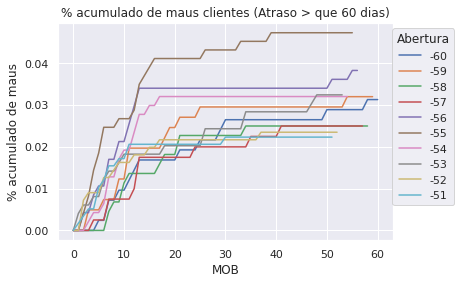

In [60]:
#a organização acima permite que uma visualização seja contruída para que possamos entender melhor o comportamento dos clientes

lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulado de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

Verifcamos acima um comportamento de estabilização. O gráfico nos diz que, independente de quando o crédito do cliente foi aberto, ele acaba estabilizando dentro de um certo período (informação importante neste contexto). 

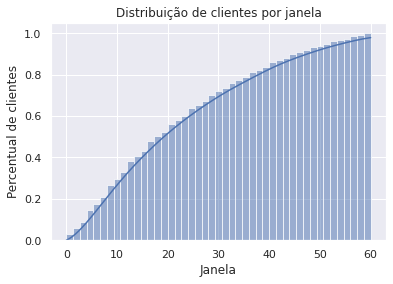

In [61]:
#gráfico com a distribuição de clientes por janela

sns.histplot(data=df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

Pelo gráfico acima verificamos que cerca de 50% dos clientes possuem cerca de 20 meses de histórico. Estamos verificando como é a distribuição de nossa base. 

In [62]:
#criando um dicionário relacionado com os índices já criados anteriormente

dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}

In [63]:
#classificação de "maus" testando outras possibilidades, em outras faixas de atraso

for chave, valor in dict_intervalo_atraso.items():
  df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


In [64]:
#vamos agora contar os clientes (calculo da taxa para diversas faixas)

dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


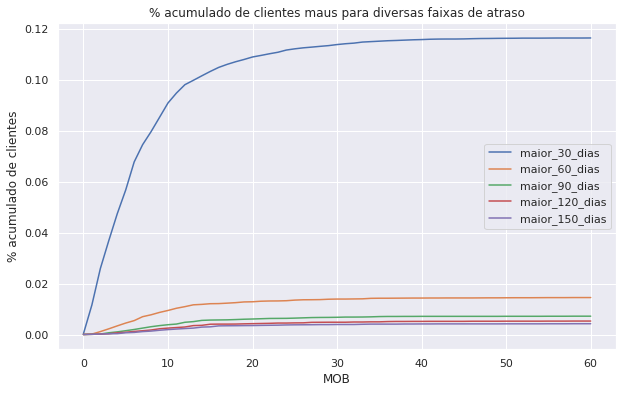

In [65]:
#com a taxa, vamos construir um novo gráfico

df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

No gráfico acima, com as cinco faixas definidas, verificamos o comportamento visto anteriormente se repete. Há uma aumento, mas depois de 12 meses de MOB há uma estabilização. A curva que considera os clientes com atraso maior que 30 dias como maus pagadores é muito maior, ou seja, se considerarmos todos que atrasam mais que 30 dias como maus pagadores, praticamente consideraremos todos os clientes da base como ruins. Pode-se estipular um atraso de até 29 dias ou não atrasar como bom cliente. A política de crédito dependerá de cada instituição financeira. Outras variávels, inclusive, poderão ser utilizadas. Estamos tentando medir aqui a PROBABILIDADE DE INADIMPLÊNCIA.

In [66]:
#janelas menores de 12 meses não são interessantes e serão removidas

len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [67]:
#criando nova variávele copiando os dados acima

df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()

In [68]:
#verificando quantos registros ficaram, depois qe retiramos os clientes com janela maior / igual do que 12 meses.
#decisão tomada: iremos trabalhar somente com clientes que possuem uma estabilidade na base de dados (cerca de 30 mil)

df_clientes_aprovados_tratamento1.shape

(943061, 14)

In [69]:
#vamos criar um novo dataframe somente com as informações importantes para a nossa análse

def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0
  
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


Será considerado somente crédito que tenha uma janela maior que 12 meses e que o atraso é menor que 60 dias. Agora temos uma cliente por linha e uma resposta binária. Isso foi concluído ao longo de várias análises.

In [70]:
df_registros_creditos_id.shape

(30918, 2)

In [71]:
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

Vamos agora pegar somente os clientes com registro de crédito, pois estes serão úteis para o modelo interpretar se tem perfil para concessão de crédito (para treinar o modelo). Agora vamos focar no Machine Learning.

In [72]:
#criando um novo dataframe

df_registro_clientes_targets = df_clientes_cadastrados_tratamento1.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0


In [73]:
# 97% da base foi classificada como "Mau"
# a base desbalanceada é um problema, e precisará ser resolvido

df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100

0    97.726673
1     2.273327
Name: Mau, dtype: float64

#Machine Learning

In [74]:
#definindo as colunas, numa lista, para organizarmos o dataframe de forma controlável 

colunas_categoricas_binarias = ['Tem_Carro',
                                'Tem_Casa_Propria',
                                'Tem_telefone_trabalho',
                                'Tem_telefone_fixo',
                                'Tem_email']
colunas_categoricas_binarias 

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email']

In [75]:
#definindo a lista para as categorias que podem assumir diversos valores

colunas_categoricas_nao_binarias = ['Categoria_de_renda',
                                    'Grau_Escolaridade',
                                    'Estado_Civil',
                                    'Moradia',
                                    'Ocupacao']
colunas_categoricas_nao_binarias

['Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Ocupacao']

In [76]:
#reorganizando a ordem das colunas do dataframe (contatenando as listas e reordenando)

df_registro_clientes_targets = df_registro_clientes_targets[['ID_Cliente'] + colunas_quantitativas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registro_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.0,0,112500.0,3.1,2.0,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0


In [77]:
#Instalando pacotes necessários

!pip install scikit-learn imbalanced-learn

In [78]:
#definindo módulo

import six
import sys
sys.modules['sklearn.externals.six'] = six

In [79]:
#imports

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix

from scipy import stats #usada para calculo de métrica

In [80]:
#função para rodar o modelo

SEED = 1561651
def roda_modelo(modelo, dados):

    # separando dados em x e y, e tambem removendo a coluna de ID_cliente
    x = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    y = dados.drop('ID_Cliente', axis=1)['Mau']
    
    # Separando dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f"KS {kstest}") #métrica utilizada para análise de crédito - crédit score (mede a maior distância entre a probabilidade de um registro de ser bom e a probabilidade de ser mau)
    #KS significa “Teste Kolmogorov-Smirnov”

    # Criando matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
    plt.grid(False)    
    plt.show(matriz_confusao)

    # Fazendo a predição dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

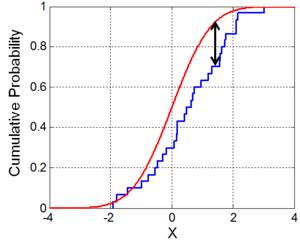


No gráfico acima vemos o valor do KS, o qual consegue medir o distanciamente entre "bons" e "maus". Com ele verificamos se o modelo está diferenciando bem "maus" e "bons". É uma medida normalizada, entre 1 e  0. Existem outras métricas utilizadas no mercado financeiro.

In [81]:
#imports para pré-processamento. Escalonamento das variáveis

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler #nosso modelo não sabe qual valor é maior ou menor. O Scaler diferencia, por exemplo, quem tem um carro e quem tem 10 carros, colocando numa régua.
from sklearn.base import BaseEstimator, TransformerMixin

In [82]:
# PEP8 padrão CamelCase (aplicando nos dados reais após aprender no FIT)

class Transformador(BaseEstimator, TransformerMixin):
    def __init__( self, colunas_continuas, colunas_categoricas):
        self.colunas_continuas = colunas_continuas
        self.colunas_categoricas = colunas_categoricas
        self.enc = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None ):
        self.enc.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_continuas])
        return self 

    def transform(self, X, y = None):
      
      X_categoricas = pd.DataFrame(data=self.enc.transform(X[self.colunas_categoricas]).toarray(),
                                  columns= self.enc.get_feature_names(self.colunas_categoricas))
      
      X_continuas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_continuas]),
                                  columns= self.colunas_continuas)
      
      X = pd.concat([X_continuas, X_categoricas], axis=1)

      return X

In [83]:
#vamos guardar na memória as etapas que vamos aplicar nos nossos dados (para aplicar nos dados reais posteriormente)

from sklearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

AUC 0.5
KS Ks_2sampResult(statistic=1.0, pvalue=0.0)


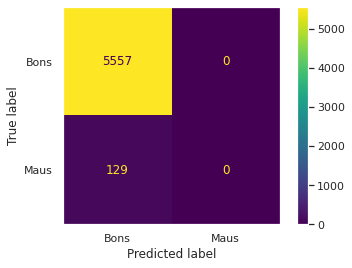


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [84]:
#acplicando o modelo
#testando inicialmente com o "DummyClassifier"

pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', DummyClassifier(strategy='prior'))])   
roda_modelo(pipeline, df_registro_clientes_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

AUC 0.5847293657137516
KS Ks_2sampResult(statistic=1.0, pvalue=0.0)


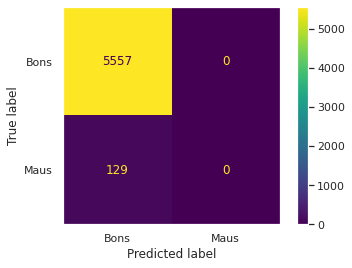


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [85]:
#a performance do modelo acima não foi boa
#testando agora com o "LogisticRegression"

pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

O modelo acima, com um modelo mais elaborado, teve um resultado igualmente ruim (chutou todos como bons clientes).

A causa deve-se ao fato dos dados estarem DESBALANCEADOS.


TÉCNICAS A SEREM EMPREGADAS (mexem com dados sintéticos, sendo que somente podemos aplicar em dados de treino! Não se deve usar no teste!):

Oversampling = objetivo de gerar dados sintéticos para o treino (o modelo aprende com esses dados gerados, deixando as classes balanceadas). Ele cria dados relativos a categoria que tem menos dados, a fim de balancear a base de treino.

Undersampling = objetivo de retirar os dados da classe que tem mais, resolvendo assim o problema de desbalanceamento.

In [86]:
#importando bibliotecas para aplicar a técnica "Oversampling" mencionada acima

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline #pipeline compatível com SMOTE

#para gerar dados sintéticos utilzaremos a técnica SMOTE (Synthetic Minority Oversampling Technique).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

AUC 0.5811037967337794
KS Ks_2sampResult(statistic=0.12996834329933168, pvalue=2.978410186831154e-42)


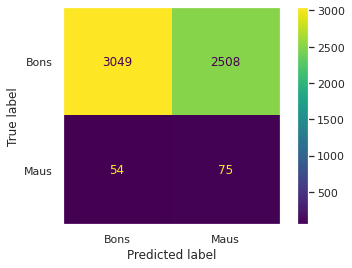


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      5557
           1       0.03      0.58      0.06       129

    accuracy                           0.55      5686
   macro avg       0.51      0.57      0.38      5686
weighted avg       0.96      0.55      0.69      5686



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [87]:
#rodando o modelo com uma nova etapa ("sampling", com o "smote")

pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

Vemos acima que perde-se em acurácia e AOC, porém esse modelo apresenta melhor desempenho do que os anterores. Entretanto, ainda não é o ideal.

In [88]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


AUC 0.8382939040500634


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


KS Ks_2sampResult(statistic=0.9794231445655998, pvalue=0.0)


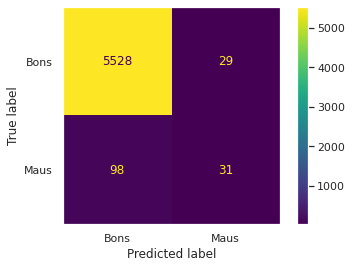


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.52      0.24      0.33       129

    accuracy                           0.98      5686
   macro avg       0.75      0.62      0.66      5686
weighted avg       0.97      0.98      0.97      5686



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [89]:
#usando um modelo mais sofisticado ("RandomForestClassifier"), sendo que vamos utilizar sem o SMOTE

pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


AUC 0.8275336784529046


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


KS Ks_2sampResult(statistic=0.9657052409426662, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


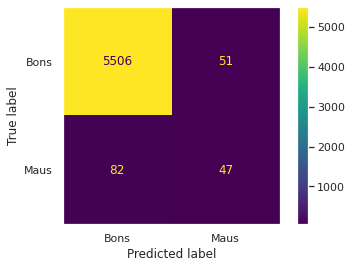

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.48      0.36      0.41       129

    accuracy                           0.98      5686
   macro avg       0.73      0.68      0.70      5686
weighted avg       0.97      0.98      0.98      5686



In [90]:
#rodando novamente com o modelo "RandomForestClassifier", agora com o "smote"

pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

Tivemos acima um resultado mais interessante do que o "LogisticRegression". Tivemos um ganho com esse modelo. Este modelo consegue diferenciar melhor as minúcias dos nossos dados. O modelo com o "smote" ficou melhor, pois conseguiu prever melhor os maus pagadores.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


AUC 0.8275336784529046


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


KS Ks_2sampResult(statistic=0.9657052409426662, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


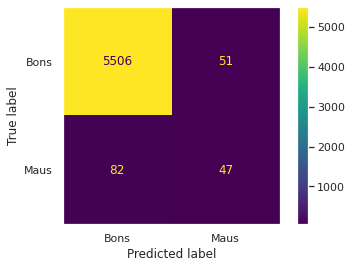

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.48      0.36      0.41       129

    accuracy                           0.98      5686
   macro avg       0.73      0.68      0.70      5686
weighted avg       0.97      0.98      0.98      5686



In [91]:
#vamos aos preparativos para levar o modelo para outro ambiente

pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

In [92]:
#retreinando o modelo (passando o máximo de dados para treinar o modelo)
#nesse ponto iremos retirar as colunas "ID_Cliente" e "Mau", pois ambas não farão parte do nosso X

x = df_registro_clientes_targets.drop(['ID_Cliente', 'Mau'], axis=1) #olhando para as colunas (axis=1)

#determinando o "y" para o modelo

y = df_registro_clientes_targets['Mau']

#treinando o modelo

pipeline.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('Transformador',
                 Transformador(colunas_categoricas=['Tem_Carro',
                                                    'Tem_Casa_Propria',
                                                    'Categoria_de_renda',
                                                    'Grau_Escolaridade',
                                                    'Estado_Civil', 'Moradia',
                                                    'Tem_telefone_trabalho',
                                                    'Tem_telefone_fixo',
                                                    'Tem_email', 'Ocupacao'],
                               colunas_continuas=['Idade', 'Qtd_Filhos',
                                                  'Rendimento_Anual',
                                                  'Anos_empregado',
                                                  'Tamanho_Familia'])),
                ('sampling', SMOTE(random_state=1561651)),
                ('Modelo', Random

In [93]:
#salvando o modelo

from joblib import dump

dump(pipeline, 'modelo.joblib')

['modelo.joblib']

In [94]:
#salvanddo as colunas que serão perguntadas ao usuário

features = x.columns
features

Index(['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado',
       'Tamanho_Familia', 'Tem_Carro', 'Tem_Casa_Propria',
       'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
       'Categoria_de_renda', 'Grau_Escolaridade', 'Estado_Civil', 'Moradia',
       'Ocupacao'],
      dtype='object')

In [95]:
dump(features, 'features.joblib')

['features.joblib']

In [96]:
#salvando os campos para posterior preenchimento

lista_campos = df_registro_clientes_targets[colunas_categoricas_nao_binarias].apply(lambda x: x.unique(),axis=0)
lista_campos

Categoria_de_renda    [Empregado, Associado comercial, Pensionista, ...
Grau_Escolaridade     [Ensino medio, Ensino superior, Ensino superio...
Estado_Civil          [Casado, Solteiro, Separado, Uniao estavel, Vi...
Moradia               [Casa propria, Alugado, Habitacao publica, Mor...
Ocupacao              [Seguranca, Venda, Outros, Contabilidade, Cons...
dtype: object

In [97]:
dump(lista_campos, 'lista_campos.joblib')

['lista_campos.joblib']